# **DESCRIPTION OF DATASET**

This dataset focuses on road accident analysis, capturing various factors that contribute to accidents. It includes both numerical and categorical features, representing aspects like the time of the accident, the number of vehicles involved, and the number of casualties. Additionally, categorical variables such as the day of the week, driver’s age group, junction type, lighting conditions, weather conditions, and vehicle movement provide crucial context about the accident's circumstances. These categorical features have been one-hot encoded, meaning they are represented as binary columns with values of either 0 or 1.

Machine learning model, which appears to be an XGBoost classifier, takes these encoded inputs and predicts an outcome related to the accident. The model processes user-provided values, transforms categorical inputs using pre-fitted encoders, and then makes a prediction based on the learned patterns from the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RTA Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


# **IMPORTANT INSIGHTS:**
Most columns are categorical, only two are numerical columns are:
Number_of_vehicles_involved
Number_of_casualties

The minimum number of vehicles involved in an accident is 1, while the maximum is 7.

The minimum number of casualties in an accident is 1, while the maximum is 8.

The mean number of vehicles involved in an accident is 2.04, indicating that most accidents involve two vehicles.

The mean number of casualties per accident is 1.55, meaning most accidents cause at least one casualty

Some severe accidents involve up to 8 casualties, likely linked to high-speed collisions or crowded vehicles.





In [ ]:
df.shape

(12316, 32)

In [ ]:
df.size

394112

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


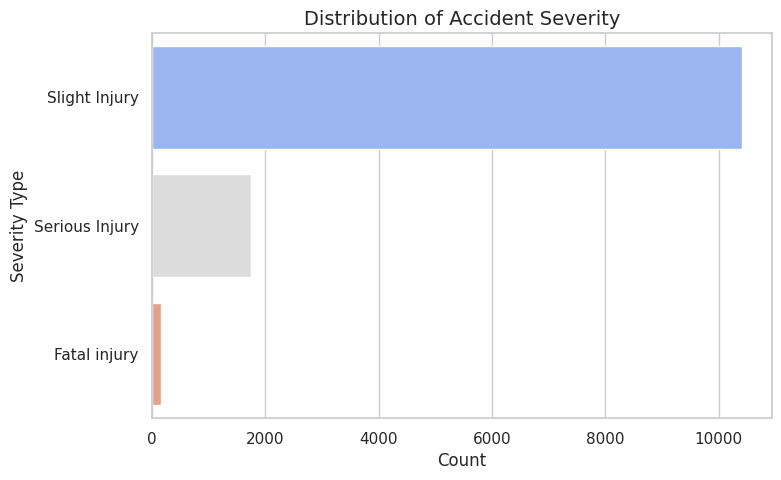

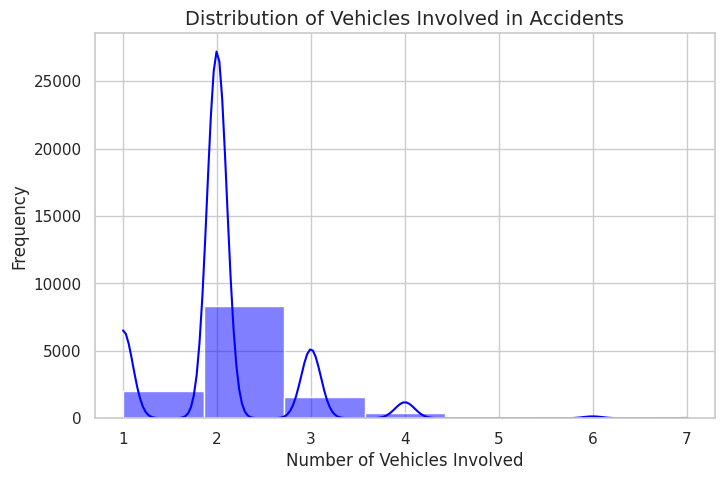

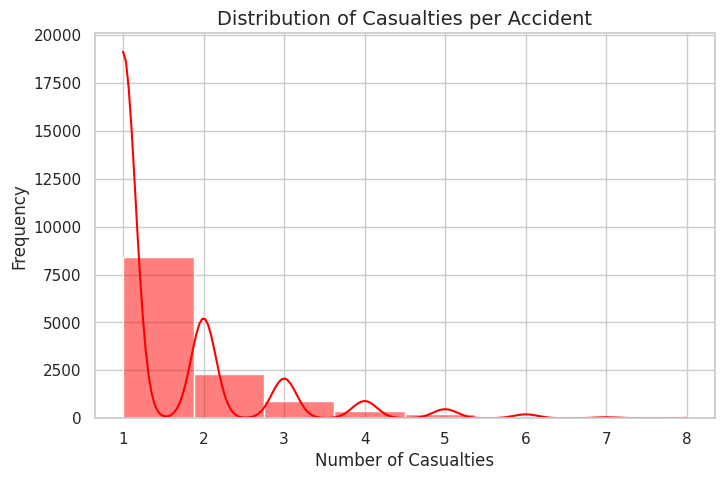

In [ ]:
df1 = pd.read_csv('/content/RTA Dataset.csv')
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of accident severity
plt.figure(figsize=(8, 5))
sns.countplot(y=df1["Accident_severity"], order=df1["Accident_severity"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Accident Severity", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Severity Type")
plt.show()
print()
# Plot number of vehicles involved in accidents
plt.figure(figsize=(8, 5))
sns.histplot(df1["Number_of_vehicles_involved"], bins=7, kde=True, color="blue")
plt.title("Distribution of Vehicles Involved in Accidents", fontsize=14)
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Frequency")
plt.show()
print()

# Plot casualties per accident
plt.figure(figsize=(8, 5))
sns.histplot(df1["Number_of_casualties"], bins=8, kde=True, color="red")
plt.title("Distribution of Casualties per Accident", fontsize=14)
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.show()


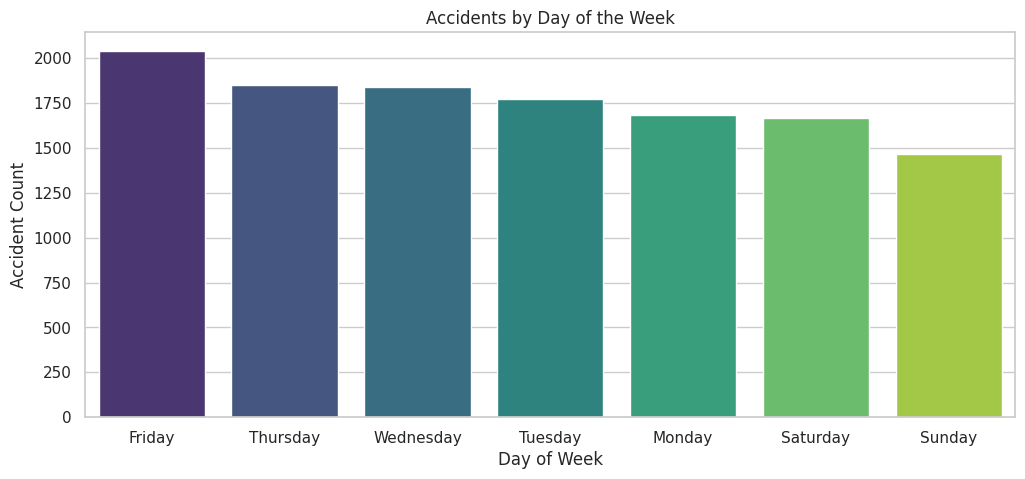

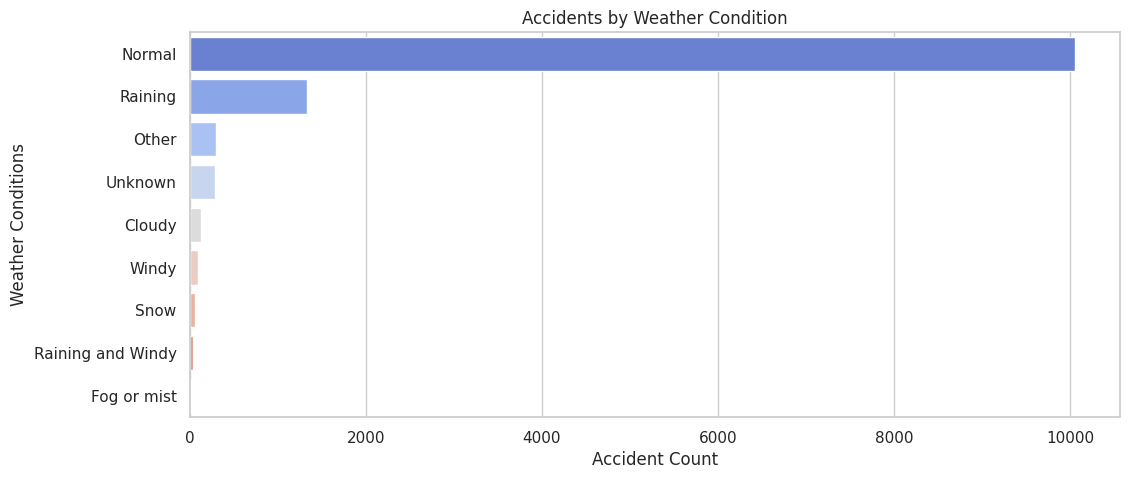

In [ ]:
# Plot accident count by day of the week
plt.figure(figsize=(12, 5))
sns.countplot(x='Day_of_week', data=df1, order=df1['Day_of_week'].value_counts().index, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.show()
print()
# Plot accident count by weather condition
plt.figure(figsize=(12, 5))
sns.countplot(y='Weather_conditions', data=df1, order=df1['Weather_conditions'].value_counts().index, palette='coolwarm')
plt.title('Accidents by Weather Condition')
plt.xlabel('Accident Count')
plt.ylabel('Weather Conditions')
plt.show()


# **Key Insights from Visualizations:**

***Accident Severity Distribution:***

The most common accident severity type is "Slight Injury," followed by "Serious Injury" and then "Fatal Injury."

This suggests that while accidents are frequent, most are not life-threatening.

***Number of Vehicles Involved:***

Most accidents involve 2 vehicles, with very few cases involving more than 4.

This supports the idea that collisions mostly happen between two cars rather than large pileups.

***Casualties Per Accident:***

The majority of accidents result in 1 casualty, with a decreasing trend as the number of casualties increases.

A few severe accidents involve up to 8 casualties, which could be due to high-speed crashes or multi-vehicle collisions.

***Accidents by Day of the Week:***

Friday has the highest number of accidents, suggesting that the end of the workweek might be a risky time, possibly due to increased traffic, fatigue, or weekend plans.

Thursday and Wednesday also have a high accident count, indicating that mid-to-late week is a peak period for road accidents.

Sunday has the lowest accident count, which could be due to lighter traffic as many people stay home or have a more relaxed schedule.

***Accidents by Weather Condition:***

The vast majority of accidents occur under "Normal" weather conditions, meaning that clear weather doesn’t necessarily equate to safer driving—other factors like human error or road conditions might play a bigger role.

"Raining" is the second highest cause of accidents, which makes sense since wet roads reduce traction, increasing the risk of skidding or collisions.

Other conditions like snow, fog, and windy weather contribute to very few accidents, likely because such extreme weather is rare or people drive more cautiously in those conditions.

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.dtypes

,0
Time,datetime64[ns]
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
# Filling null values with mode
for column in df.select_dtypes(include=['object']).columns:  # Select only categorical columns
    if df[column].isnull().any():  # Check if the column has any missing values
        df[column] = df[column].fillna(df[column].mode()[0])  # Fill with mode

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


# **ENCODING THE COLUMNS FOR BETTER PREDICTION**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Accident_severity')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encode categorical columns

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


In [ ]:
# Drop original categorical columns and concatenate encoded features
df.drop(columns=categorical_cols, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
# Drop any remaining NaN values
df.dropna(inplace=True)

# **APPLYING DIFFERENT ALGORITHMS**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define target and features (assuming the target column is "Accident_severity")
y = df["Accident_severity"]
X = df.drop(columns=["Accident_severity"])
encoders = {}
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Split dataset
X['Time'] = pd.to_numeric(pd.to_datetime(X['Time']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GNB": GaussianNB(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
}
# Apply models and compute accuracy & MSE
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append([model_name, acc, mse])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Mean Square Error'])
print(results_df)

                        Model  Accuracy  Mean Square Error
0          LogisticRegression  0.837662           0.207386
1      DecisionTreeClassifier  0.769886           0.280032
2                         SVM  0.837662           0.207386
3        KNeighborsClassifier  0.831169           0.213880
4                         GNB  0.837662           0.207386
5      RandomForestClassifier  0.838880           0.206169
6          AdaBoostClassifier  0.837662           0.207386
7  GradientBoostingClassifier  0.840909           0.196834


# **FINAL MODEL TRAINING**

In [ ]:
df['Time'] = pd.to_numeric(pd.to_datetime(df['Time']))
encoders = {}
# Define target and features
y = df["Accident_severity"]
X = df.drop(columns=["Accident_severity"])

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target variable
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# Function to perform feature selection and model evaluation
def evaluate_feature_selection(X, y, num_features_list):
    results = []

    for k in num_features_list:
        # Select top k features
        selector = SelectKBest(score_func=chi2, k=k)
        X_new = selector.fit_transform(X, y)

        # Get selected feature names
        selected_features = X.columns[selector.get_support()]
        print(f"Top {k} features selected: {list(selected_features)}\n")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train, y_train)

        # Make predictions
        y_pred = xgb_model.predict(X_test)

        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results.append([k, accuracy, mse])

    # Store results in DataFrame
    results_df = pd.DataFrame(results, columns=['Num Features', 'Accuracy', 'MSE'])
    return results_df

# Define feature selection steps
num_features_list = [30, 25, 20, 15, 10]

# Run feature selection and evaluate
feature_selection_results = evaluate_feature_selection(X, y, num_features_list)

# Display results
print(feature_selection_results)

Top 30 features selected: ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown', 'Driving_experience_2-5yr', 'Driving_experience_Below 1yr', 'Type_of_vehicle_Lorry (11?40Q)', 'Type_of_vehicle_Other', 'Type_of_vehicle_Pick up upto 10Q', 'Area_accident_occured_Recreational areas', 'Area_accident_occured_Residential areas', 'Area_accident_occured_Unknown', 'Types_of_Junction_No junction', 'Types_of_Junction_Other', 'Road_surface_type_Gravel roads', 'Road_surface_conditions_Snow', 'Light_conditions_Darkness - no lighting', 'Light_conditions_Daylight', 'Weather_conditions_Other', 'Weather_conditions_Raining', 'Weather_conditions_Unknown', 'Type_of_collision_Collision with pedestrians', 'Vehicle_movement_Overtaking', 'Cause_of_accident_Moving Backward', 'Cause_of_accident_Overspeed']

Top 25 features selected: ['Time', 'Number

In [ ]:
# Run Feature Selection & Hyperparameter Tuning
num_features_list = [30, 25, 20, 15, 10]
feature_selection_results, best_params_dict = evaluate_feature_selection(X, y, num_features_list)

# Select 15 Features as Best Choice
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

selected_feature_names = X.columns[selector.get_support()]
print("\n✅ Selected Features for Final Model:", list(selected_feature_names))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Selected Features for Final Model: ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown', 'Area_accident_occured_Unknown', 'Types_of_Junction_No junction', 'Types_of_Junction_Other', 'Light_conditions_Darkness - no lighting', 'Weather_conditions_Other', 'Type_of_collision_Collision with pedestrians', 'Vehicle_movement_Overtaking']


In [ ]:
#  Store best parameters for k=15
selected_feature_names = ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown', 'Area_accident_occured_Unknown', 'Types_of_Junction_No junction', 'Types_of_Junction_Other', 'Light_conditions_Darkness - no lighting', 'Weather_conditions_Other', 'Type_of_collision_Collision with pedestrians', 'Vehicle_movement_Overtaking']  # Use the best parameters found

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns  # Find categorical features
encoders = {}  # Store encoders

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert categorical values to numerical
    encoders[col] = le  # Save encoders for later use

# Train-test split (Final Model Training)
X_train, X_test, y_train, y_test = train_test_split(X[selected_feature_names], y, test_size=0.2, random_state=42)

# Train the Final Model
xgb_model = XGBClassifier(selected_feature_names)
xgb_model.fit(X_train, y_train)
print("\n✅ Final Model Trained Successfully!")

# Evaluate Final Model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Model Accuracy: {accuracy:.4f}")



✅ Final Model Trained Successfully!

🎯 Final Model Accuracy: 0.8657


# **TESTING THE MODEL ON USER DATA**

In [ ]:
numerical_columns = ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties']
categorical_columns = ['Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
                       'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown',
                       'Area_accident_occured_Unknown', 'Types_of_Junction_No junction',
                       'Types_of_Junction_Other', 'Light_conditions_Darkness - no lighting',
                       'Weather_conditions_Other', 'Type_of_collision_Collision with pedestrians',
                       'Vehicle_movement_Overtaking']

encoders = {}  # Store LabelEncoders for categorical features

def predict_user_input():
    user_input = {}

    print("\n🔹 Enter values for the selected features:")
    for feature in selected_feature_names:
        value = input(f"{feature}: ")

        # Convert to int/float if applicable, otherwise keep as string
        if feature in numerical_columns:
            try:
                if '.' in value:
                    user_input[feature] = float(value)  # Convert to float
                else:
                    user_input[feature] = int(value)  # Convert to int
            except ValueError:
                print(f"⚠️ Invalid numeric input for {feature}. Setting as NaN.")
                user_input[feature] = None  # Handle invalid input
        else:
            user_input[feature] = value  # Keep as string for categorical features

    # ✅ Convert input dictionary to DataFrame
    user_df = pd.DataFrame([user_input])

    # ✅ Encode only categorical features
    for col in categorical_columns:
        if col in user_df.columns:
            if col in encoders:  # Check if encoder exists
                if user_df[col][0] in encoders[col].classes_:
                    user_df[col] = encoders[col].transform([user_df[col][0]])[0]
                else:
                    user_df[col] = -1  # Assign -1 for unseen categories
            else:
                user_df[col] = -1  # If column wasn't seen before

    # ✅ Convert to a proper format for prediction
    user_input_array = user_df[selected_feature_names].iloc[0]  # Use iloc instead of reshape

    # ✅ Make prediction
    predicted_encoded = xgb_model.predict([user_input_array])[0]

    # ✅ Decode the prediction if output_encoder is available
    if 'label_encoder' in globals():  # Check if output_encoder is defined
        predicted_decoded = label_encoder.inverse_transform([predicted_encoded])[0]
    else:
        predicted_decoded = predicted_encoded  # If no encoder, keep as is

    print("\n🔹 **Predicted Output (Decoded):**", predicted_decoded)

# ✅ Call function to take user input and predict
predict_user_input()



🔹 Enter values for the selected features:
Time: 15.5
Number_of_vehicles_involved: 2
Number_of_casualties: 1
Day_of_week_Monday: True
Day_of_week_Saturday: False
Day_of_week_Sunday: True
Age_band_of_driver_Under 18: True
Age_band_of_driver_Unknown: False
Area_accident_occured_Unknown: False
Types_of_Junction_No junction: True
Types_of_Junction_Other: False
Light_conditions_Darkness - no lighting: True
Weather_conditions_Other: False
Type_of_collision_Collision with pedestrians: True
Vehicle_movement_Overtaking: True

🔹 **Predicted Output (Decoded):** Slight Injury
